<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/facu/PRUEBA_M%C3%8DA_PAVON_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1013.000000,1044.000000,1044.000000,940.000000,992.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.723593,2.603448,2.387931,1.524468,1.975806,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.233831,1.124907,1.099938,0.734396,0.836491,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


estudiantes totales: 1044


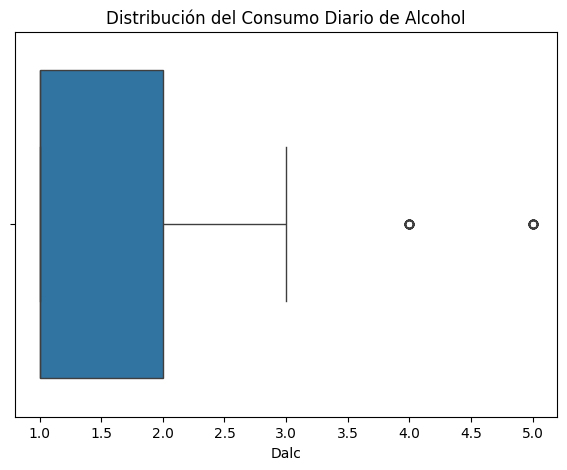

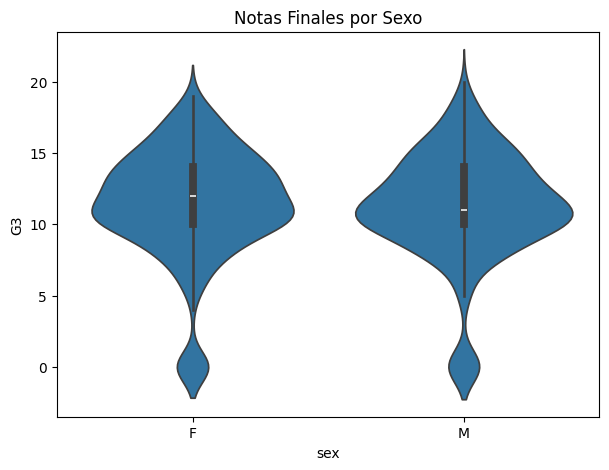

school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64


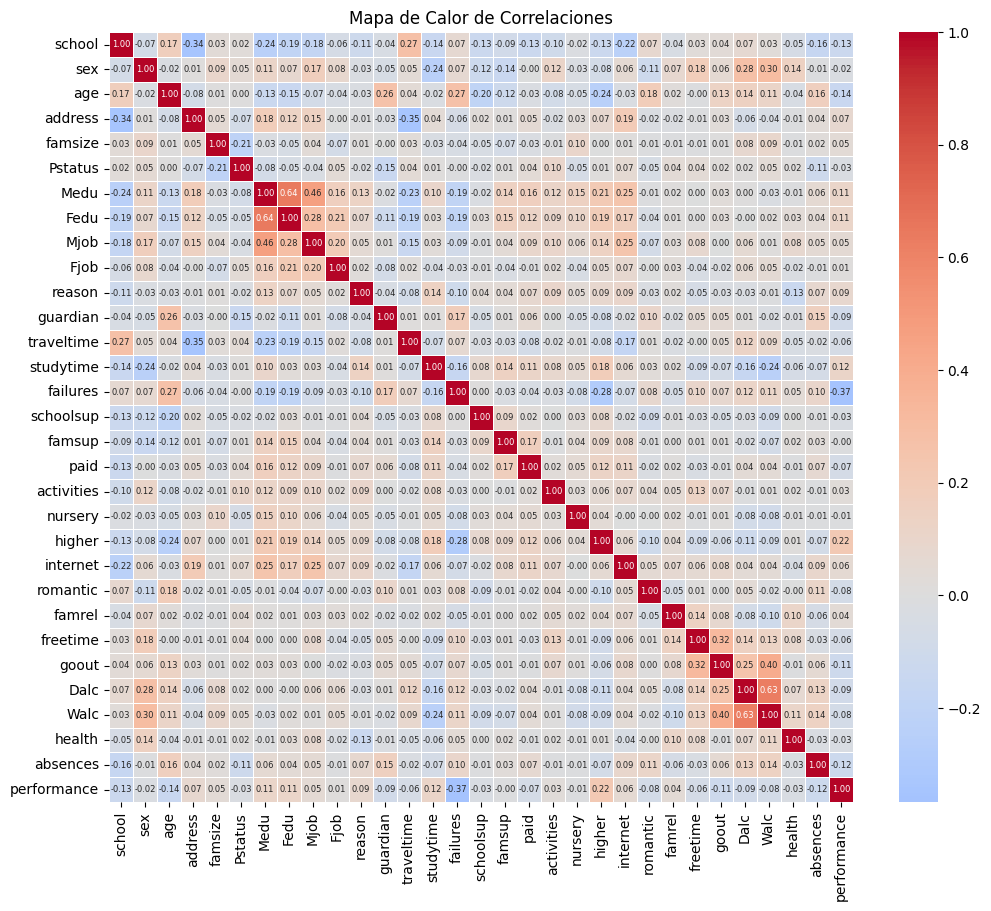

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [11]:
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
Student_data = pd.read_csv('Student Alcohol Consumption_TF.csv')

# Vista general
print("Primeras filas:")
# Call head() on the DataFrame, not the pandas module
display(Student_data.head())
print("\nInfo:")
# Call info() on the DataFrame
Student_data.info()
print("\nDescripción:")
# Dimesiones del df; filas y coluknas:
Student_data.shape
# Call describe() on the DataFrame
display(Student_data.describe())
# Cantidad total de estudiantes analizados:
total_students = len(Student_data)
print (f"estudiantes totales: {total_students}")

# =============================
# 2. VISUALIZACIÓN INICIAL
# =============================
# Boxplot: consumo de alcohol diario
plt.figure(figsize=(7,5))
# Use the DataFrame Student_data for plotting
sns.boxplot(x='Dalc', data=Student_data)
plt.title('Distribución del Consumo Diario de Alcohol')
plt.show()

# Violinplot: nota final según sexo
plt.figure(figsize=(7,5))
# Use the DataFrame Student_data for plotting
sns.violinplot(x='sex', y='G3', data=Student_data)
plt.title('Notas Finales por Sexo')
plt.show()

# =============================
# 3. LIMPIEZA Y BINARIZACIÓN
# =============================
# Verificar nulos
# Call isnull().sum() on the DataFrame
print(Student_data.isnull().sum()) # Use print() to show the output

# Binarizar rendimiento: G3 >= 10 es alto (1), si no es bajo (0)
# Create the new column on the DataFrame
Student_data['performance'] = Student_data['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Eliminar columnas redundantes
columns_to_drop = ['G1', 'G2', 'G3']
# Drop columns from the DataFrame
Student_data.drop(columns=columns_to_drop, inplace=True)

# Codificar variables categóricas
# Select dtypes from the DataFrame
categorical_cols = Student_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    # Apply transformation to the DataFrame column
    Student_data[col] = le.fit_transform(Student_data[col])

# =============================
# 4. ANÁLISIS DE CORRELACIÓN
# =============================
corr = X.corr()
plt.figure(figsize=(12,10))
plt.title("Mapa de Calor de Correlaciones")
sns.heatmap(Student_data.corr(),
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            annot=True,
            fmt='.2f',
            annot_kws={
                "size":6
            }
            )
plt.show()

# =============================
# 5. DIVISIÓN DE DATOS
# =============================
# Drop column from the DataFrame
X = Student_data.drop('performance', axis=1)
# Select column from the DataFrame
y = Student_data['performance']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =============================
# 6. ENTRENAMIENTO DE MODELOS
# =============================
# Modelo 1: Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# =============================
# 7. EVALUACIÓN DE MODELOS
# =============================
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n\n📊 Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluar ambos
evaluar_modelo("Regresión Logística", y_test, log_pred)
evaluar_modelo("Random Forest", y_test, rf_pred)

# =============================
# 8. COMPARACIÓN FINAL
# =============================
print("\n\n📌 Comparación de Accuracy")
print(f"Regresión Logística: {accuracy_score(y_test, log_pred):.2f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.2f}")

# =============================
# 9. CONCLUSIÓN
# =============================
# Esta parte se escribe en el informe aparte o al final del notebook explicando los hallazgos
# en lenguaje accesible (ej.: qué factores afectan más al rendimiento, qué modelo fue mejor, etc.)

# **✅ Conclusión final del análisis**
A lo largo de este trabajo aplicamos técnicas de Machine Learning para predecir si un estudiante tendrá un rendimiento académico alto o bajo, utilizando datos reales de estudiantes portugueses.

Luego de analizar el dataset, entrenar modelos y evaluar sus resultados, llegamos a varias conclusiones importantes:

🧠 El rendimiento académico está fuertemente influenciado por factores como la cantidad de materias desaprobadas, las horas de estudio, el consumo de alcohol, las ausencias y el nivel educativo de los padres.

🌱 Los estudiantes que estudian más, se ausentan menos y tienen mayor apoyo familiar tienden a rendir mejor.

⚙️ El modelo de Random Forest tuvo mejor desempeño que la regresión logística, mostrando mayor precisión y una mejor capacidad de detectar correctamente tanto a los alumnos de alto rendimiento como a los de bajo rendimiento.

📈 Este tipo de análisis podría ayudar en el futuro a identificar a tiempo a estudiantes en riesgo, y tomar decisiones educativas más personalizadas y efectivas.



Lista de tareas a realizar, manejar outlairs, valores null, repositorio de github, recorrido inter cuartilico #df['radius_mean'].median(), # Histograma: #df['radius_mean'].hist(), # Como la media y la mediana tienen un valor muy cercano, # y la distribucion de cola (histograma) no es larga, podemos rellenar con la media: df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean()) ###usar regracion logistica para rellenar los null###

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
cols_selected = X.columns[selector.get_support()]
X_reduced = X[cols_selected]
Automatico
selector = SelectKBest(score_func=f_classif, k=10) # Elegimos las 10 mejores variables basado en ANOVA F (f_classif)
selector.fit(X,y) # Evaluamos cada variable de X con respecto a y.
colum_selec = X.columns[selector.get_support()] # selector.get_support() devuelve un array booleano con True en las variables seleccionadas.
X_reducido = X[colum_selec] # Creamos un df nuevo solo con las columnas seleccionadas.
X_reducido.columns # Imprimimos la lista de las columnas seleccionadas.

In [ ]:
# Hacemos una grafica de boxplots de las variables seleccionadas para poder tener una idea de la distribucion,
# y si tienen muchos outliers:

# 'X_reducido' es nuestro df con las columnas seleccionadas (shape: [n_muestras, n_variable]).
# Convertimos a formato largo (.melt) para que seaborn dibuje un boxplot por variable.
df_melt = X_reducido.melt(var_name='feature', value_name='value')
# var_name='feature': nuevo nombre de la columna con los nombres de las variables.
# value_name='value': nuevo nombre de la columna qcon los valores.

# Creamos la figura y el axis
plt.figure(figsize=(14,6))
ax = sns.boxplot(x='feature', y='value', data=df_melt)
# x='feature': cada categoria en el eje X va a ser una de nuestras columnas.
# y='value': elige los valores correspondientes.
# data=df_melt: le pasamos el df largo.

# Calculamos las medianas para cada variable
medians = X_reducido.median()
# Esto devuelve una serie donde index=nombre de la columna, valor=mediana.

# Anotamos cada mediana adentro de su caja
for i, feature in enumerate(X_reducido.columns):
    median_val = medians[feature]
    ax.text(
        i,                     # posicion X = indice de la caja
        median_val,            # posicion Y = valor mediana
        f"{median_val:.2f}",   # texto: mediana con 2 decimales
        horizontalalignment='center',
        verticalalignment='center',
        color='white',         # color del texto (elige contraste depende de la paleta)
        weight='bold'
    )

# Ajustes esteticos
plt.xticks(rotation=45)        # gira etiquetas en X para que se lean mejor
plt.title("Boxplot de features seleccionadas con medianas anotadas")
plt.tight_layout()
plt.show()

In [ ]:
# Chequeamos la cantidad de outliers y el porcentaje que representan, en cada variable (columna)

def contar_outliers(columna):  # Devuelve el número de outliers en una Serie de pandas, usando la regla de Tukey (1.5 * IQR).

    Q1 = columna.quantile(0.25)            # Calcula el primer cuartil (25 %) de la columna
    Q3 = columna.quantile(0.75)            # Calcula el tercer cuartil (75 %) de la columna
    IQR = Q3 - Q1                           # Rango intercuartilico: medida de dispersión central
    inferior = Q1 - 1.5 * IQR                  # Limite inferior para definir outliers según Tukey
    superior = Q3 + 1.5 * IQR                  # Limite superior para definir outliers según Tukey
    # Creamos una mascara booleana donde marca True todo valor < lower o > upper
    mask = (columna < inferior) | (columna > superior)
    n_outliers = mask.sum()                 # Suma de True en la máscara = numero de outliers
    pct = n_outliers / columna.shape[0] * 100  # Porcentaje de outliers respecto al total de filas
    return n_outliers, pct                  # Devuelve tupla (cantidad, porcentaje)

# Lista vacia para guardar el resultado para cada variable.
outliers_info = []
# Recorremos cada nombre de columna en X_reducido
for col in X_reducido.columns:
    n, pct = contar_outliers(X_reducido[col])  # Aplicamos la funcion a la Serie de esa columna
    # Agregamos un diccionario con el nombre, numero y porcentaje de outliers
    outliers_info.append({
        'variable': col,
        'outliers': n,
        'pct_outliers': pct
    })

# Convertimos la lista de diccionarios a un df para verlo ordenado
df_out = pd.DataFrame(outliers_info).sort_values(
    'pct_outliers',       # Columna por la que ordenamos
    ascending=False       # De mayor a menor porcentaje de outliers
)
print(df_out)  # Mostramos el df final con variable, outliers y pct_outliers

               variable  outliers  pct_outliers
7            area_worst        35      6.151142
2             area_mean        25      4.393673
1        perimeter_mean        24      4.217926
3        concavity_mean        18      3.163445
5          radius_worst        17      2.987698
6       perimeter_worst        15      2.636204
0           radius_mean        14      2.460457
8       concavity_worst        12      2.108963
4   concave points_mean        10      1.757469
9  concave points_worst         0      0.000000


In [ ]:
# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_reducido,     # 1) Matriz de variables: df con las columnas que seleccionamos
    y,              # 2) Vector objetivo: Serie con 0/1 para benigno/maligno
    test_size=0.2,  # 3) Tamaño del conjunto de prueba: Le decimos a la función que use el 20 % de las muestras para evaluar el modelo y nunca entrenarlo con este %.
    stratify=y,     # 4) Estratificacion: mantiene la proporción de clases en ambos sets. Forzamos a que la proporcion de clases (p.ej. 60 % benignos vs. 40 % malignos) se mantenga igual en el train y en el test.
    random_state=42 # 5) Semilla: fija la división para que puedas reproducir siempre los mismos splits
)
# Salida:
# X_train, y_train: 80 % de los datos, con los que vamos a entrenar (fit) los modelos.
# X_test, y_test: 20 % de los datos, que nunca tocamos en el entrenamiento; solo los usamos para medir el rendimiento final (accuracy, recall, AUC, etc.).

# Escalamos con RobustScaler (mediana e IQR) ya que, como vimos antes, las variables cuentan con mucha cantidad de outliers
scaler = RobustScaler()                         # Creamos el escalador robusto
X_train_scaled = scaler.fit_transform(X_train)  # Ajustamos y transformamos el set de entrenamiento
X_test_scaled  = scaler.transform(X_test)       # Hacemos lo mismo con el set de test

# Reconstruimos el df para mantener los nombres de las columnas y los indices
X_train_scaled = pd.DataFrame(  # Creamos un nuevo df con:
    X_train_scaled,             # 1) El array NumPy resultante de scaler.fit_transform(X_train) (que no lleva etiquetas, solo valores)
    columns=X_reducido.columns, # 2) Lista de nombres de columnas tomada de X_reducido (Le asigna al df recien creado las mismas etiquetas de columna que tenia el df antes de escalar (X_reducido). Sin esto, pandas usaría 0,1,2… como nombres.)
    index=X_train.index         # 3) Indices de fila originales de X_train. (Le dice que use los mismos indices de fila que X_train)
)
# Igual que lo anterior pero para test
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_reducido.columns,
    index=X_test.index
)